In [101]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
import string
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [102]:

df = pd.read_csv("spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [103]:

df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [104]:

df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)


In [105]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [106]:
df['v2'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [107]:

df['v2'][1]

'Ok lar... Joking wif u oni...'

In [108]:

df['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

<Axes: xlabel='v1'>

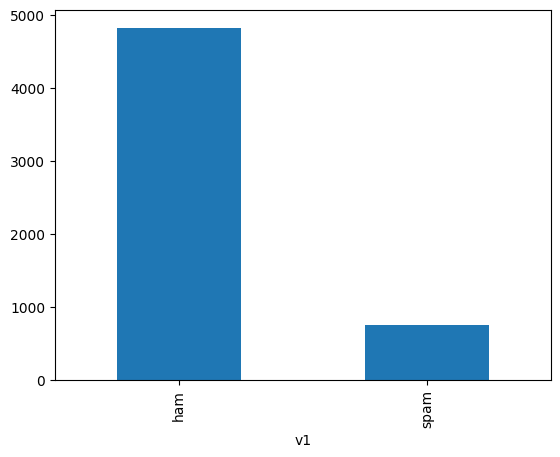

In [109]:

df['v1'].value_counts().plot(kind='bar')

In [110]:

def function(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub('\s+[^a-zA-Z]\s+', '', text)
    text = re.sub('\w*\d\w*', '', text)
    pattern = re.compile(r'\b(' + '|'.join(stopwords.words('english')) + r')\b\s*')
    text = re.sub(pattern, '', text)
    return text

df['text'] = df['v2'].apply(function)


In [111]:
df['text'].unique()

array(['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
       'ok lar joking wif u oni',
       'free entry ina wkly comp win fa cup final tktsst maytext fa toto receive entry questionstd txt ratetcs applyover  ',
       ..., 'pity  mood soany suggestions',
       'guy bitching acted like id interested buying something else next week gave us free',
       'rofl true name'], dtype=object)

In [112]:

df.drop(['v2'],axis=1,inplace=True)

In [113]:

df['target'] = df['v1']

In [114]:

df.drop(['v1'],inplace=True,axis=1)

In [115]:

df.head()

,text,target
0,go jurong point crazy available bugis n great ...,ham
1,ok lar joking wif u oni,ham
2,free entry ina wkly comp win fa cup final tkts...,spam
3,u dun say early hor u c already say,ham
4,nah dont think goes usf lives around though,ham


In [116]:

ps = PorterStemmer()

def porter(text):
    text =[ps.stem(word) for word in text.split()]
    return text

df['text'] = df['text'].apply(porter)

In [117]:

df.head()

,text,target
0,"[go, jurong, point, crazi, avail, bugi, n, gre...",ham
1,"[ok, lar, joke, wif, u, oni]",ham
2,"[free, entri, ina, wkli, comp, win, fa, cup, f...",spam
3,"[u, dun, say, earli, hor, u, c, alreadi, say]",ham
4,"[nah, dont, think, goe, usf, live, around, tho...",ham


In [118]:

def join_list(text):
    text = ' '.join(text)
    return text

df['text'] = df['text'].apply(join_list)

In [123]:

from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

train_data,test_data = train_test_split(df,test_size=0.2,random_state=42)


In [124]:
train_data

,text,target
1978,im boat still mom check yo im half nake,ham
3989,bank granit issu strongbuy explos pick member ...,spam
3935,r give second chanc rahul dengra,ham
4078,play smash bro ltgt religi,ham
4086,privat youraccount statement forshowsunredeem ...,spam
...,...,...
3772,came hostel go sleep plz call class hrishi,ham
5191,sorri ill call later,ham
5226,prabhaim sorydarealyfrm heart im sori,ham
5390,nt joke serious told,ham


In [126]:

y_train = train_data['target']
y_test = test_data['target']

# converting in the numerical
label_replace={'ham':0,'spam':1}
y_train = y_train.map(label_replace)
y_test = y_test.map(label_replace)


In [127]:
y_train

1978    0
3989    1
3935    0
4078    0
4086    1
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: target, Length: 4457, dtype: int64

In [128]:

x_train = train_data.drop(['target'],axis=1)
x_test = test_data.drop(['target'],axis=1)

x_train

,text
1978,im boat still mom check yo im half nake
3989,bank granit issu strongbuy explos pick member ...
3935,r give second chanc rahul dengra
4078,play smash bro ltgt religi
4086,privat youraccount statement forshowsunredeem ...
...,...
3772,came hostel go sleep plz call class hrishi
5191,sorri ill call later
5226,prabhaim sorydarealyfrm heart im sori
5390,nt joke serious told


In [135]:

tdif = TfidfVectorizer()
tdif.fit_transform(x_train).toarray()

array([[1.]])